In [5]:
from src import Modeler, Processor, Reader
import pandas as pd
from datetime import datetime
import numpy as np

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [6]:
# Using the US Census regions from here: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
south_atlantic_states = [
    10   # Delaware
    , 11 # DC
    , 12 # Florida
    , 13 # Georgia
    , 24 # Maryland
    , 37 # North Carolina
    , 45 # South Carolina
    , 51 # Virginia
    , 54 # West Virginia
]
state_filter = south_atlantic_states

In [7]:
state_dict = {
    'code' : ['10', '11', '12', '13', '24', '37', '45', '51', '54']
    , 'state_name' : ['Delware', 'DC', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia']
}

state_code_map = pd.DataFrame(data=state_dict)

In [8]:
state_code_map.head()

,code,state_name
0,10,Delware
1,11,DC
2,12,Florida
3,13,Georgia
4,24,Maryland


## Loading data

In [9]:
# Instantiate preprocessor
preprocessor = Processor.PreProcessor(state_filter=state_filter)

In [10]:
# Loading the data WITHOUT FIPs codes, Months, and State turned into boolean columns, use this:
preprocessor.load_processed_data_without_fips_as_columns()

/Users/elizabethmartens/cs5644/project/projectGitRepo/src/Processor.py:36: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  merged_df = self.init_cdc_data().merge(self.init_vaccinations_data(), how='left', on=['date', 'FIPS'])
/Users/elizabethmartens/cs5644/project/projectGitRepo/src/Processor.py:36: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  merged_df = self.init_cdc_data().merge(self.init_vaccinations_data(), how='left', on=['date', 'FIPS'])


In [11]:
# Load processed data with FIPS codes turned into boolean columns
# preprocessor.load_processed_data()

In [12]:
# Put data into a df to work with
df = preprocessor.get_current_data()

In [13]:
df.head()

,gathering_ban_order_group_ban_gatherings_of_any_size,gathering_ban_order_group_ban_over_101_or_more_ppl,gathering_ban_order_group_ban_over_11_to_25_ppl,gathering_ban_order_group_ban_over_1_to_10_ppl,gathering_ban_order_group_ban_over_26_to_50_ppl,gathering_ban_order_group_ban_over_51_to_100_ppl,gathering_ban_order_group_no_order_found,gathering_ban_express_preemption_Expressly Preempts,gathering_ban_express_preemption_Expressly Preempts Less Restrictive Measures,gathering_ban_express_preemption_Unknown,...,cases,deaths,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths,month,STATE
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,25.142857,0.142857,3.428571,3.857143,3.428571,0.285714,0.285714,0.285714,April,10
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,26.714286,0.285714,4.714286,3.428571,3.857143,0.285714,0.285714,0.285714,April,10
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,27.857143,0.285714,6.142857,4.714286,3.428571,0.000000,0.285714,0.285714,April,10
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,22.857143,0.428571,8.714286,6.142857,4.714286,0.000000,0.000000,0.285714,April,10
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,26.000000,0.571429,14.428571,8.714286,6.142857,0.142857,0.000000,0.000000,April,10


In [14]:
df.shape

(289884, 98)

## Data Viz

In [16]:
# Scatterplot of cases over time
# Scatterplot of deaths over time

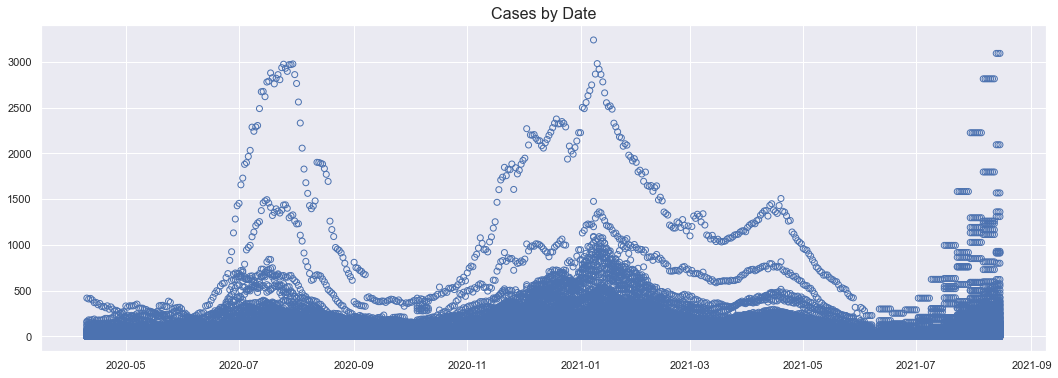

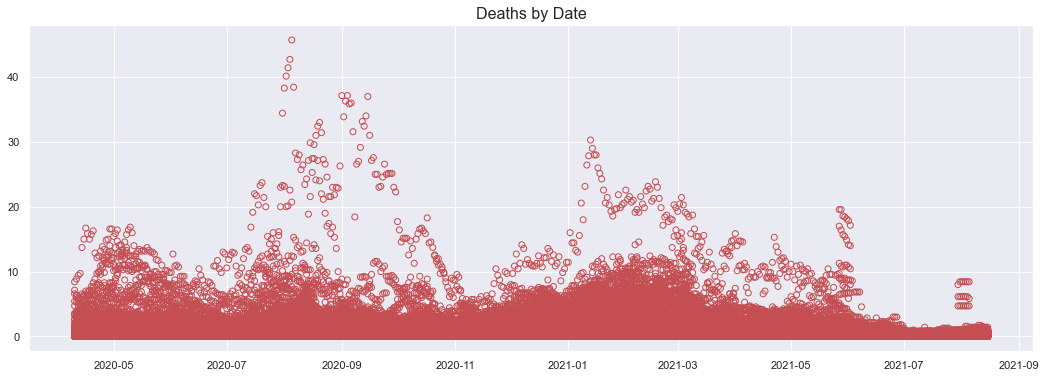

In [17]:
# Looking at each target variable based on day:
plt.figure(figsize=(18, 6))
plt.scatter(x='date', y='cases', data=df, color='none', edgecolor='b')
plt.title('Cases by Date', fontsize=16);
plt.show()
plt.figure(figsize=(18, 6))
plt.scatter(x='date', y='deaths', data=df, color='none', edgecolor='r')
plt.title('Deaths by Date', fontsize=16);
plt.show()

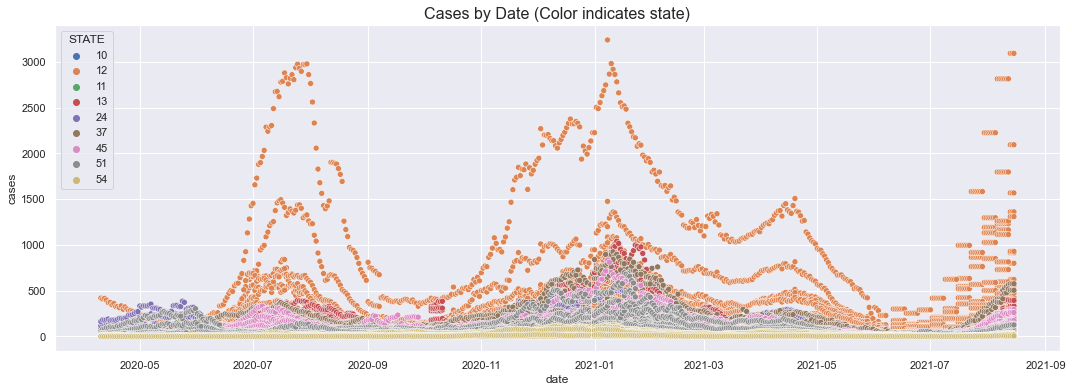

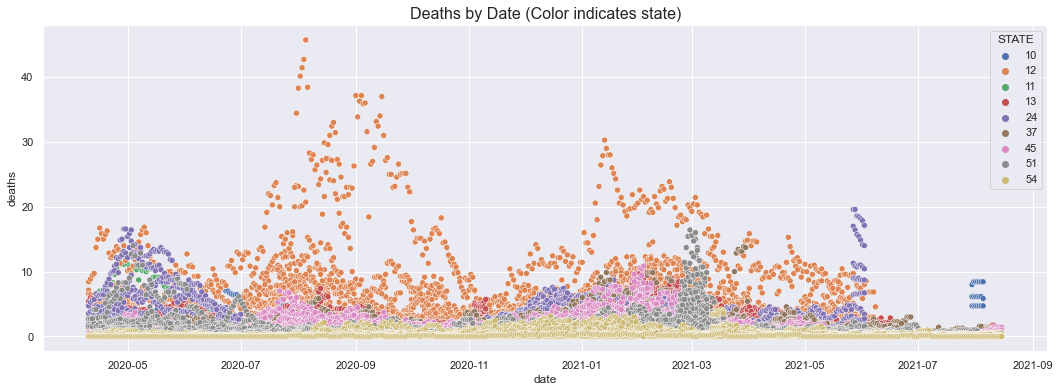

In [18]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='cases', hue='STATE', data=df);
plt.title('Cases by Date (Color indicates state)', fontsize=16);
plt.show()
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='deaths', hue='STATE', data=df);
plt.title('Deaths by Date (Color indicates state)', fontsize=16);
plt.show()

In [19]:
# Create df grouped by state and graph
state_df = df[['date', 'STATE', 'cases', 'deaths']].groupby(['date','STATE']).sum().reset_index()
state_df = state_df.merge(state_code_map, how='inner', left_on=['STATE'], right_on=['code'])
state_df.head()

,date,STATE,cases,deaths,code,state_name
0,2020-04-10,10,123.857143,2.571429,10,Delware
1,2020-04-11,10,124.714286,2.714286,10,Delware
2,2020-04-12,10,136.000000,3.000000,10,Delware
3,2020-04-13,10,139.285714,3.714286,10,Delware
4,2020-04-14,10,141.000000,3.857143,10,Delware


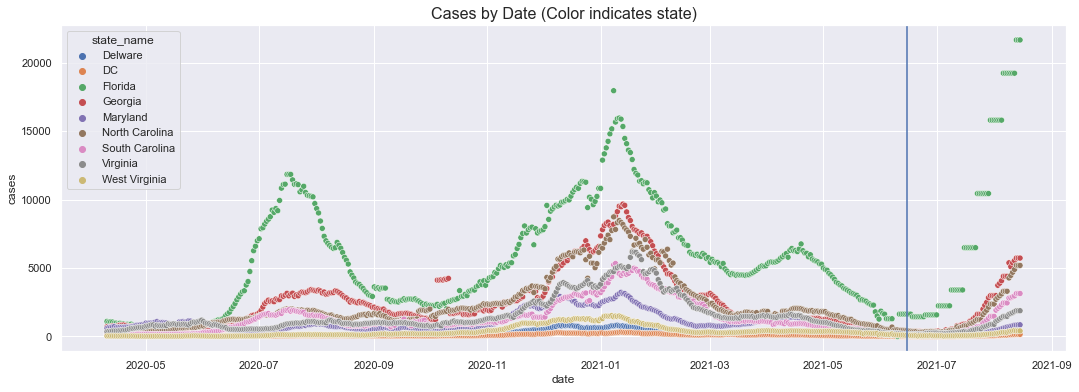

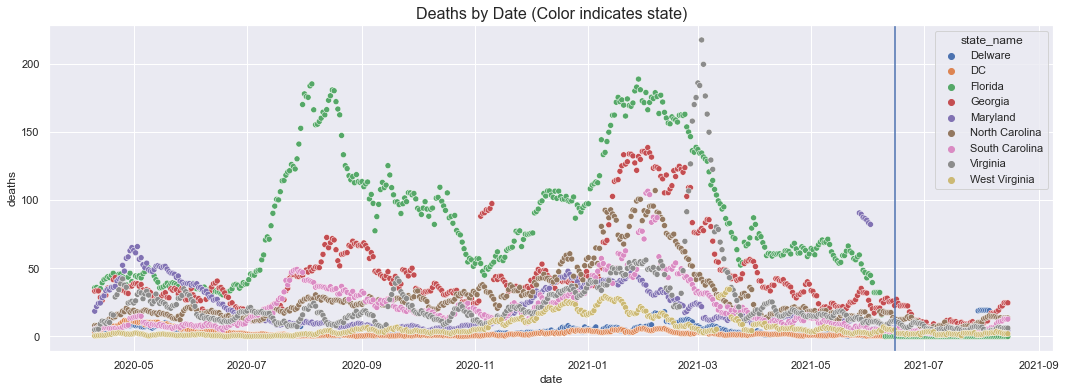

In [47]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='cases', hue='state_name', data=state_df);
plt.title('Cases by Date (Color indicates state)', fontsize=16);
plt.axvline(x=datetime.strptime('2021-06-15', '%Y-%m-%d'))
plt.show()
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='deaths', hue='state_name', data=state_df);
plt.axvline(x=datetime.strptime('2021-06-15', '%Y-%m-%d'))
plt.title('Deaths by Date (Color indicates state)', fontsize=16);
plt.show()

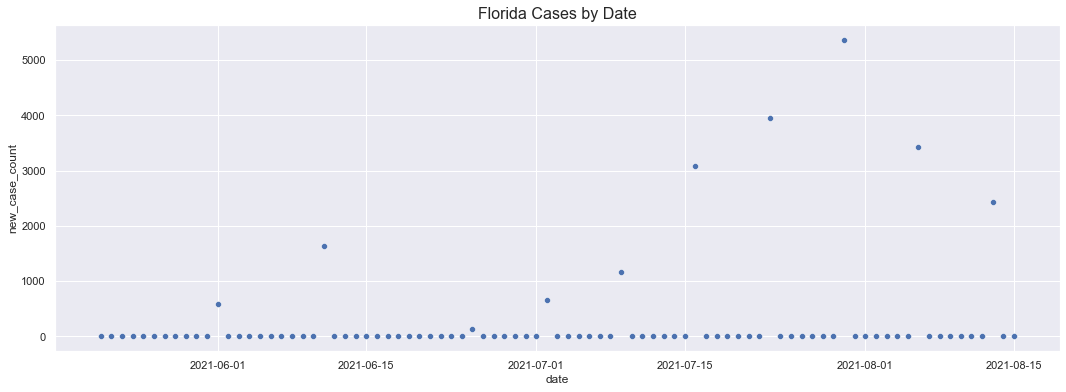

In [25]:
# It looks like FL has transitioned to only reporting data once a week. 
# This will mess up our predictions since there will an artificially high jump between days on the date
# That they update the numbers
florida_last100 = state_df[((state_df['state_name'] == 'Florida') & (state_df['date'] > datetime.strptime('2021-05-20', '%Y-%m-%d')))].copy()
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_case_count', data=florida_last100);
plt.title('Florida Cases by Date', fontsize=16);
plt.show()

In [26]:
florida_last100.head(25)

,date,STATE,cases,deaths,code,state_name,previous_day_cases,new_case_count
1392,2021-05-21,12,2675.428571,66.428571,12,Florida,2847.285714,0.000000
1393,2021-05-22,12,2690.571429,62.714286,12,Florida,2675.428571,15.142857
1394,2021-05-23,12,2634.285714,61.428571,12,Florida,2690.571429,0.000000
1395,2021-05-24,12,2581.571429,57.142857,12,Florida,2634.285714,0.000000
1396,2021-05-25,12,2448.857143,56.285714,12,Florida,2581.571429,0.000000
1397,2021-05-26,12,2378.714286,58.428571,12,Florida,2448.857143,0.000000
1398,2021-05-27,12,2298.428571,59.857143,12,Florida,2378.714286,0.000000
1399,2021-05-28,12,2293.285714,53.285714,12,Florida,2298.428571,0.000000
1400,2021-05-29,12,1804.428571,48.571429,12,Florida,2293.285714,0.000000
1401,2021-05-30,12,1501.571429,47.000000,12,Florida,1804.428571,0.000000


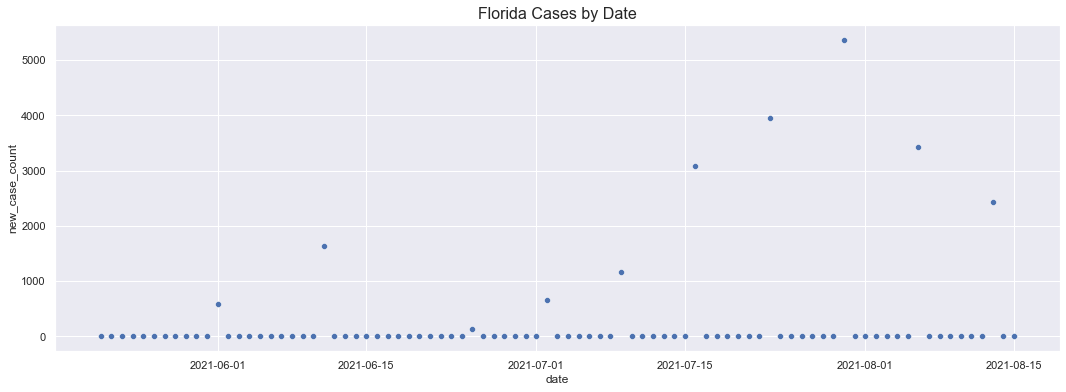

In [27]:
# It looks like FL has transitioned to only reporting data once a week. 
# This will mess up our predictions since there will an artificially high jump between days on the date
# That they update the numbers
florida = state_df[(state_df['state_name'] == 'Florida')].copy()
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_case_count', data=florida_last100);
plt.title('Florida Cases by Date', fontsize=16);
plt.show()

In [28]:
state_df[state_df['previous_day_cases'].isna()]['date'].drop_duplicates()

0   2020-04-10
Name: date, dtype: datetime64[ns]

In [29]:
new_cases = florida_last100['new_case_count'].values

In [30]:
x = np.repeat(1, 3)
x

array([1, 1, 1])

In [31]:
list(x.reshape(-1, 1))

[array([1]), array([1]), array([1])]

In [32]:
y = []

In [33]:
y.append(x)

In [34]:
y

[array([1, 1, 1])]

In [35]:
most_recent_no = 0
count_since_last_no = 0
in_zero_count = False
result = []
for i, day_x in zip(range(0, len(new_cases)), new_cases):
    if i == len(new_cases) - 1: # Last value
        if day_x == 0:
            result += [v for v in np.repeat(0, count_since_last_no + 1)] # Just append 0s
    if day_x == 0: # New cases = 0
        count_since_last_no += 1
        in_zero_count = True
    else: # New cases != 0
        if count_since_last_no > 0: # If the prior new case counts are 0
            spread_out_value = (day_x - most_recent_no)/count_since_last_no # PBed count no
            # Create an array of spread out values:
            result += [v for v in np.repeat(spread_out_value, count_since_last_no + 1)]
        else:
            result.append(day_x)
        most_recent_no = day_x
        count_since_last_no = 0
            
  
    

In [36]:
florida_last100.head(15)

,date,STATE,cases,deaths,code,state_name,previous_day_cases,new_case_count
1392,2021-05-21,12,2675.428571,66.428571,12,Florida,2847.285714,0.000000
1393,2021-05-22,12,2690.571429,62.714286,12,Florida,2675.428571,15.142857
1394,2021-05-23,12,2634.285714,61.428571,12,Florida,2690.571429,0.000000
1395,2021-05-24,12,2581.571429,57.142857,12,Florida,2634.285714,0.000000
1396,2021-05-25,12,2448.857143,56.285714,12,Florida,2581.571429,0.000000
1397,2021-05-26,12,2378.714286,58.428571,12,Florida,2448.857143,0.000000
1398,2021-05-27,12,2298.428571,59.857143,12,Florida,2378.714286,0.000000
1399,2021-05-28,12,2293.285714,53.285714,12,Florida,2298.428571,0.000000
1400,2021-05-29,12,1804.428571,48.571429,12,Florida,2293.285714,0.000000
1401,2021-05-30,12,1501.571429,47.000000,12,Florida,1804.428571,0.000000


In [37]:
result[:15]

[15.142857142856428,
 15.142857142856428,
 62.79365079365084,
 62.79365079365084,
 62.79365079365084,
 62.79365079365084,
 62.79365079365084,
 62.79365079365084,
 62.79365079365084,
 62.79365079365084,
 62.79365079365084,
 62.79365079365084,
 117.30158730158746,
 117.30158730158746,
 117.30158730158746]

In [38]:
florida_last100['test'] = result

In [39]:
florida_last100.head(30)

,date,STATE,cases,deaths,code,state_name,previous_day_cases,new_case_count,test
1392,2021-05-21,12,2675.428571,66.428571,12,Florida,2847.285714,0.000000,15.142857
1393,2021-05-22,12,2690.571429,62.714286,12,Florida,2675.428571,15.142857,15.142857
1394,2021-05-23,12,2634.285714,61.428571,12,Florida,2690.571429,0.000000,62.793651
1395,2021-05-24,12,2581.571429,57.142857,12,Florida,2634.285714,0.000000,62.793651
1396,2021-05-25,12,2448.857143,56.285714,12,Florida,2581.571429,0.000000,62.793651
1397,2021-05-26,12,2378.714286,58.428571,12,Florida,2448.857143,0.000000,62.793651
1398,2021-05-27,12,2298.428571,59.857143,12,Florida,2378.714286,0.000000,62.793651
1399,2021-05-28,12,2293.285714,53.285714,12,Florida,2298.428571,0.000000,62.793651
1400,2021-05-29,12,1804.428571,48.571429,12,Florida,2293.285714,0.000000,62.793651
1401,2021-05-30,12,1501.571429,47.000000,12,Florida,1804.428571,0.000000,62.793651


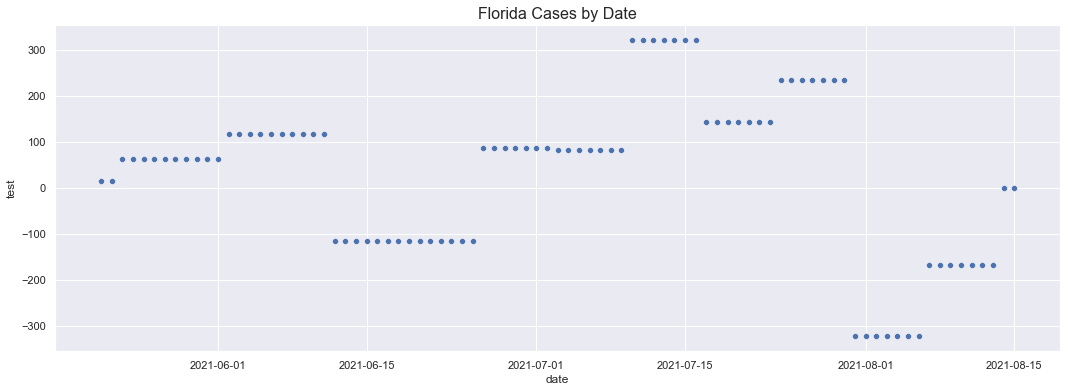

In [40]:
# It looks like FL has transitioned to only reporting data once a week. 
# This will mess up our predictions since there will an artificially high jump between days on the date
# That they update the numbers
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='test', data=florida_last100);
#sns.scatterplot(x='date', y='new_case_count', data=florida_last100);
plt.title('Florida Cases by Date', fontsize=16);
plt.show()

In [41]:
new_cases = florida['new_case_count'].values
most_recent_no = 0
count_since_last_no = 0
result = []
for i, day_x in zip(range(0, len(new_cases)), new_cases):
    if day_x == 0: # New cases = 0
        if i == len(new_cases) - 1: # Last value
            result += [v for v in np.repeat(0, count_since_last_no + 1)] # Just append 0s
        else: 
            count_since_last_no += 1
    else: # New cases != 0
        if count_since_last_no > 0: # If the prior new case counts are 0
            spread_out_value = (day_x - most_recent_no)/count_since_last_no # PBed count no
            # Create an array of spread out values:
            result += [v for v in np.repeat(spread_out_value, count_since_last_no + 1)]
        else:
            result.append(day_x)
        most_recent_no = day_x
        count_since_last_no = 0

florida['new_case_count'] = result

In [42]:
# Using "spread out" daily case numbers
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='test', data=florida);
plt.title('Florida Cases by Date', fontsize=16);
plt.show()

ValueError: Could not interpret value `test` for parameter `y`

<Figure size 1296x432 with 0 Axes>

In [ ]:
maryland = state_df[(state_df['state_name'] == 'Maryland')].copy()
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='deaths', data=maryland);
plt.title('Maryland Deaths by Date', fontsize=16);
plt.show()

In [ ]:
maryland[(maryland['date'] > datetime.strptime('2021-05-10', '%Y-%m-%d'))].head(40)

In [ ]:
maryland_counties = df[(df['STATE'] == '24')].copy()
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='deaths', hue='FIPS', data=maryland_counties);
plt.title('Maryland Deaths by Date (Color indicates county)', fontsize=16);
plt.show()

In [ ]:
new_cases = florida['new_case_count'].values
most_recent_no = 0
count_since_last_no = 0
result = []
for i, day_x in zip(range(0, len(new_cases)), new_cases):
    if day_x == 0: # New cases = 0
        if i == len(new_cases) - 1: # Last value
            result += [v for v in np.repeat(0, count_since_last_no + 1)] # Just append 0s
        else: 
            count_since_last_no += 1
    else: # New cases != 0
        if count_since_last_no > 0: # If the prior new case counts are 0
            spread_out_value = (day_x - most_recent_no)/count_since_last_no # PBed count no
            # Create an array of spread out values:
            result += [v for v in np.repeat(spread_out_value, count_since_last_no + 1)]
        else:
            result.append(day_x)
        most_recent_no = day_x
        count_since_last_no = 0

florida['new_case_count'] = result